<a href="https://colab.research.google.com/github/jackgurae/DS_project/blob/main/Colab_Portfolio/Neural_Network_intuition_with_Keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Network intuition with Keras**

Build & Train Neural Network
From linear to image classification

In [ ]:
from tensorflow import keras
import matplotlib.pyplot as plt 
import numpy as np
import pandas as pd

*Create simeple problem* 

* relationship on 2D space
* Linear relationship (linear regression)
* Parabolic relationship
* Add noise to replicate real world problems



Linear problem

simulate linear problem and add random term to mimic real world data.


In [ ]:
n = 100
X = np.random.rand(n)
def funcx(X):
  return 3*X + 3 + np.random.rand()*0.1
  
Y = np.array(list(map(funcx, X)))

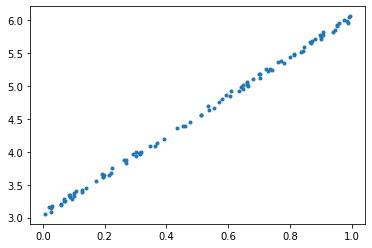

In [ ]:
plt.plot(X,Y,'.');

Neural Network

No hidden layer is possible to solve this problem.

In [ ]:
# sequential model
model = keras.Sequential([
    keras.layers.Dense(1, input_shape=(1,)),  # weight & bias, no activation function               
])
opt = keras.optimizers.SGD(learning_rate=0.1)
loss = 'mse'
model.compile(loss=loss,optimizer=opt)

In [ ]:
history = model.fit(X,Y,epochs=50)

Epoch 1/50
4/4 [==============================] - 0s 4ms/step - loss: 8.3016e-04
Epoch 2/50
4/4 [==============================] - 0s 8ms/step - loss: 8.3189e-04
Epoch 3/50
4/4 [==============================] - 0s 4ms/step - loss: 8.4268e-04
Epoch 4/50
4/4 [==============================] - 0s 3ms/step - loss: 8.4851e-04
Epoch 5/50
4/4 [==============================] - 0s 4ms/step - loss: 8.4863e-04
Epoch 6/50
4/4 [==============================] - 0s 5ms/step - loss: 8.4735e-04
Epoch 7/50
4/4 [==============================] - 0s 4ms/step - loss: 8.3967e-04
Epoch 8/50
4/4 [==============================] - 0s 4ms/step - loss: 8.3768e-04
Epoch 9/50
4/4 [==============================] - 0s 5ms/step - loss: 8.4057e-04
Epoch 10/50
4/4 [==============================] - 0s 4ms/step - loss: 8.3507e-04
Epoch 11/50
4/4 [==============================] - 0s 10ms/step - loss: 8.5883e-04
Epoch 12/50
4/4 [==============================] - 0s 10ms/step - loss: 8.4171e-04
Epoch 13/50
4/4 [======

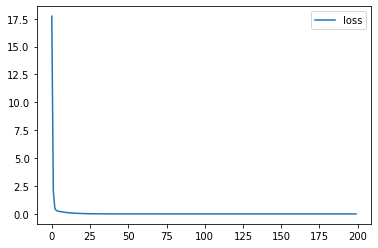

In [ ]:
pd.DataFrame(history.history).plot();

In [ ]:
Predicted = model.predict(X)

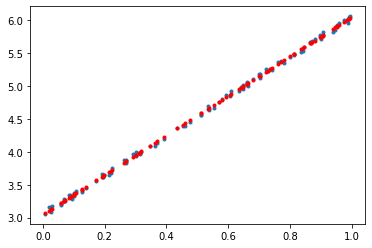

In [ ]:
plt.plot(X, Y, '.')
plt.plot(X, Predicted, '.r')

Quadratic polynomial

In [ ]:
n = 100
X = np.random.rand(n)

def funcx(X):
  return abs(X-0.5)**2 + np.random.rand()*0.03

Y = np.array(list(map(funcx, X)))

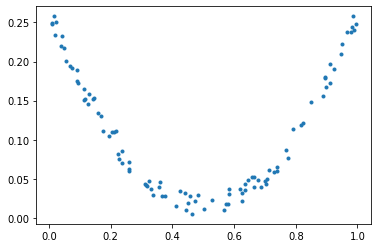

In [ ]:
plt.plot(X,Y,'.');

In [ ]:
# Initialize model
keras.backend.clear_session()

2nd Neural Network
* 1D input layer
* 1 hidden layer
* 2 perceptrons(nodes)
* 1 output layer

In this problem, I tries to use 2 RELU activation function to generalize quadratic of order 2 relationship.


In [ ]:
# sequential model
model = keras.Sequential([
    keras.layers.Dense(1, input_shape=(1,)),                      
    keras.layers.Dense(2,activation='relu'),
    keras.layers.Dense(1)
])
opt = keras.optimizers.SGD(learning_rate=0.5)
# opt = keras.optimizers.Adam(learning_rate=0.01)
# loss = keras.losses.BinaryCrossentropy(from_logits=True)
loss = 'mse'
model.compile(loss=loss,optimizer=opt)


In [ ]:
history = model.fit(X,Y,epochs=100)

Epoch 1/100
4/4 [==============================] - 0s 3ms/step - loss: 0.2248
Epoch 2/100
4/4 [==============================] - 0s 3ms/step - loss: 0.0073
Epoch 3/100
4/4 [==============================] - 0s 3ms/step - loss: 0.0053
Epoch 4/100
4/4 [==============================] - 0s 3ms/step - loss: 0.0044
Epoch 5/100
4/4 [==============================] - 0s 3ms/step - loss: 0.0040
Epoch 6/100
4/4 [==============================] - 0s 3ms/step - loss: 0.0035
Epoch 7/100
4/4 [==============================] - 0s 3ms/step - loss: 0.0035
Epoch 8/100
4/4 [==============================] - 0s 4ms/step - loss: 0.0030
Epoch 9/100
4/4 [==============================] - 0s 3ms/step - loss: 0.0030
Epoch 10/100
4/4 [==============================] - 0s 4ms/step - loss: 0.0031
Epoch 11/100
4/4 [==============================] - 0s 3ms/step - loss: 0.0023
Epoch 12/100
4/4 [==============================] - 0s 3ms/step - loss: 0.0020
Epoch 13/100
4/4 [==============================] - 0s 3ms/st

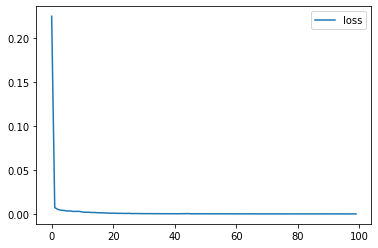

In [ ]:
pd.DataFrame(history.history).plot();

In [ ]:
Predicted = model.predict(X)

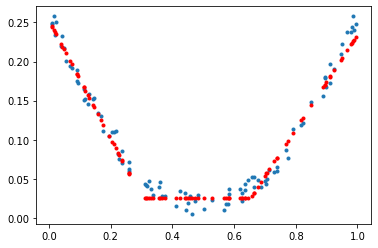

In [ ]:
plt.plot(X, Y, '.')
plt.plot(X, Predicted, '.r')

2 RELU activation functions are the least complex model to generalize this problem. 


Note that sometime, the model stucks at local minimum. In this case, I use high learning rate.


In real case, you will need more nodes and hidden layer to make a better chance that your model will not stuck at local minimum.

# More Node, More depth

In [ ]:
n = 1000
X = np.random.rand(n)
Y = np.sin(2*np.pi*X) + np.random.rand(n) * 0.3

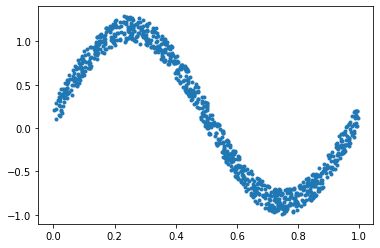

In [ ]:
plt.plot(X,Y,'.');

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=1)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=1)

In [ ]:
# Initialize model
keras.backend.clear_session()

In [ ]:
# sequential model
model2 = keras.models.Sequential([
  keras.layers.Dense(100,activation='relu',input_shape=(1,)),
  keras.layers.Dense(100,activation='relu'),
  keras.layers.Dense(1)
])

model2.compile(loss='mse',optimizer=keras.optimizers.SGD(learning_rate=0.01))


In [ ]:
history = model2.fit(X_train,y_train,epochs=500)

Epoch 1/500
20/20 [==============================] - 0s 2ms/step - loss: 0.5429
Epoch 2/500
20/20 [==============================] - 0s 2ms/step - loss: 0.5099
Epoch 3/500
20/20 [==============================] - 0s 2ms/step - loss: 0.4794
Epoch 4/500
20/20 [==============================] - 0s 2ms/step - loss: 0.4507
Epoch 5/500
20/20 [==============================] - 0s 2ms/step - loss: 0.4222
Epoch 6/500
20/20 [==============================] - 0s 2ms/step - loss: 0.3911
Epoch 7/500
20/20 [==============================] - 0s 2ms/step - loss: 0.3643
Epoch 8/500
20/20 [==============================] - 0s 2ms/step - loss: 0.3373
Epoch 9/500
20/20 [==============================] - 0s 2ms/step - loss: 0.3100
Epoch 10/500
20/20 [==============================] - 0s 2ms/step - loss: 0.2853
Epoch 11/500
20/20 [==============================] - 0s 2ms/step - loss: 0.2635
Epoch 12/500
20/20 [==============================] - 0s 2ms/step - loss: 0.2436
Epoch 13/500
20/20 [=================

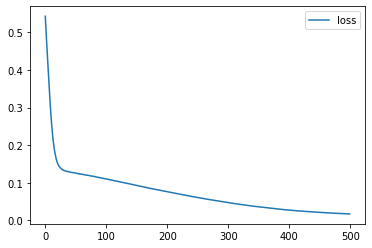

In [ ]:
pd.DataFrame(history.history).plot();

In [ ]:
Z = model2.predict(X_test)

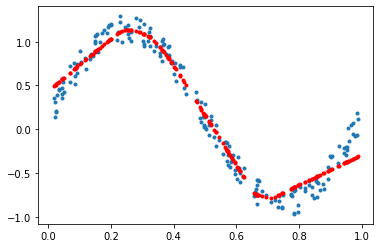

In [ ]:
plt.plot(X_test,y_test,'.')
plt.plot(X_test,Z,'.r')

# Image Classification

**MINST Dataset**
